# `pandas` Part 8: Using `pandas` to Collect and Analyze Web Data
### Part(a): Reading, Storing, and Cleaning Financial Web Data
### Part(b): Visualizing Data

# Learning Objectives

## After completing this lesson you will be able to:
1. Install a convenient web data collection tool `pandas_datareader`
2. Apply pandas to a "real world" problem/exercise related to stock analysis
3. Scrape/extract data from the web and store in a pandas DataFrame
4. Perform descriptive analytics on stock data
5. Calculate common stock metrics such returns and moving average
6. Visualize data 
 
## Modules needed for this lesson 
>- pandas
>- datetime
>- pandas_datareader, see notes for installation
>- matplotlib


## Files Needed and/or Data Sources:
>- We will use `pandas_datareader` to extract data from YahooFinance


## Initial references for this lesson (more given throughout lesson):
>- Lesson Tutorial: https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7
>- Pandas Data Reader: https://pandas-datareader.readthedocs.io/en/latest/
>- Datetime module: https://docs.python.org/3/library/datetime.html
>>- Also see: https://www.w3schools.com/python/python_datetime.asp
>- Matplotlib: https://matplotlib.org/tutorials/index.html

# Pandas Part 8(a): Reading, Storing and Cleaning Financial Data

## Install the `pandas-datareader` module
### Several ways to install the pandas datareader module
1. `pip install pandas-datareader`
>- Mac users would do this in new terminal window
>- Windows users would do this in PowerShell
2. `conda install pandas-datareader`
>- Do conda install if on pc through anaconda powershell
>- Open Anaconda PowerShell prompt and type the above comands
3. You can also install within a notebook code cell as shown below

#### Note: for all of these options restart jupyter notebooks and/or Anaconda for the changes to take place

##### One way to install the pandas-datareader module is from within jupyter

In [ ]:
# conda install pandas-datareader

## Import Necessary Modules

### These are our fundamental modules for working with pandas and reading data from the web

In [2]:
import pandas as pd, datetime as dt, pandas_datareader as pdr

### The following are needed for the data visualization component of this lesson
>- We will be using a popular python data visualization module name, `matplotlib` 
>- Below is a link for various tutorials on `matplotlib`. A lot of cool stuff here! 
>>- https://matplotlib.org/tutorials/index.html

In [3]:
# The first statement on line 3 allows us to see our graphs in the notebook output

%matplotlib inline

import matplotlib.pyplot as plt

from matplotlib import style #Style lets us customize our charts

import matplotlib as mpl

## Set up variables to define our start and end dates for stock analysis
>- We will look at stock prices over the past 10 years

In [4]:
start = dt.datetime(2010,1,1)

end = dt.datetime(2020,12,31)

## Create a DataFrame by Reading Data from YahooFinance
>- To see other data sources check out the following link:
https://github.com/wilsonfreitas/awesome-quant#data-sources
>- Initially, we will look at all the data but then we will turn our focus to the `Closing Price`
>- The first example pulls stock data for Apple with the ticker symbol of `aapl` but any stock including ETFs and Index funds can but used

In [5]:
apple = round(pdr.DataReader('aapl','yahoo',start,end),2)

In [6]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.66,7.59,7.62,7.64,493729600.0,6.54
2010-01-05,7.70,7.62,7.66,7.66,601904800.0,6.55
2010-01-06,7.69,7.53,7.66,7.53,552160000.0,6.45
2010-01-07,7.57,7.47,7.56,7.52,477131200.0,6.44
2010-01-08,7.57,7.47,7.51,7.57,447610800.0,6.48


In [7]:
apple.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-07,124.57,122.25,122.31,123.75,86712000.0,123.75
2020-12-08,124.98,123.09,124.37,124.38,82225500.0,124.38
2020-12-09,125.95,121.00,124.53,121.78,115089200.0,121.78
2020-12-10,123.87,120.15,120.50,123.24,81312200.0,123.24
2020-12-11,122.76,120.55,122.43,122.41,86860000.0,122.41


## What are the metadata and basic statistics for our DataFrame?
>- Note: metadata is data about data (e.g., number of records and fields, data types, primary/foreign keys, etc)

### Some Metadata and Descriptive Questions to Answer
1. How many days of stock prices do we have in our DataFrame? 
2. How many fields do we have to work with? 
3. What kind of data do we have to work with? 
4. What are the descriptive statistics for all the fields in the DataFrame?
5. Then, we will answer some other descriptive analytics questions. 

##### How many records and fields do we have to work with?
>- Note: records in this example represent the number of days of stock data we have

In [8]:
apple.shape

(2756, 6)

##### What kind of data do we have to work with?

In [9]:
apple.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

##### What are the descriptive statistics on Apple's stock?

In [10]:
round(apple.describe(),2)

,High,Low,Open,Close,Volume,Adj Close
count,2756.00,2756.00,2756.00,2756.00,2.756000e+03,2756.00
mean,33.65,32.96,33.31,33.32,2.863065e+08,31.45
std,24.03,23.37,23.70,23.72,2.301148e+08,24.13
min,7.00,6.79,6.87,6.86,2.019780e+07,5.87
25%,17.60,17.28,17.45,17.44,1.190794e+08,15.30
50%,27.19,26.63,26.91,26.92,2.039756e+08,24.70
75%,43.18,42.43,42.80,42.78,3.903438e+08,41.11
max,137.98,130.53,137.59,134.18,1.880998e+09,133.95


## Prepare Data: Define New Variables and Create Common Financial Variables

### Question: How has Apple's adjusted closing price performed over the last 10 years? 
>- We have already calculated descriptive statistics for all fields but let's do it just for 'Adj Close'

#### Define a variable for adjusted close and run some descriptive stats on it

In [11]:
aClose = apple['Adj Close']

In [12]:
aClose.head()

Date
2010-01-04    6.54
2010-01-05    6.55
2010-01-06    6.45
2010-01-07    6.44
2010-01-08    6.48
Name: Adj Close, dtype: float64

In [13]:
aClose.tail()

Date
2020-12-07    123.75
2020-12-08    124.38
2020-12-09    121.78
2020-12-10    123.24
2020-12-11    122.41
Name: Adj Close, dtype: float64

In [14]:
aClose.describe()

count    2756.000000
mean       31.447097
std        24.132862
min         5.870000
25%        15.305000
50%        24.695000
75%        41.110000
max       133.950000
Name: Adj Close, dtype: float64

## Create Variables for Common Financial Metrics

### An Important Financial Metric:  Returns

Returns: $R_t = (P_t/P_{t-1}) - 1$

>- Where, 
>>- $R_t$ = return at time, t
>>- $P_t$ = the price at time, t
>>- $P_{t-1}$ is the price at time, t- 1 (the day before in our example)


#### To calculate daily returns...

In [15]:
dayRet = (aClose/aClose.shift(1))-1

#### Note: The `shift()` function essentially takes all the data in the original column and moves/shifts it by the number passed to it
>- In our example, we used `shift(1)` which takes aclose and shifts all the values 1 day

#### To see how `shift()` is working, we can create a DataFrame to store the current day price and a lag (prior day) price

In [16]:
aClose_lag1 = pd.DataFrame({'DayPrice':aClose,
                           'PriorDayPrice':aClose.shift(1),
                           'DayRet':round(dayRet,3),
                           },
                          index=aClose.index)

aClose_lag1

,DayPrice,PriorDayPrice,DayRet
Date,,,
2010-01-04,6.54,NaN,NaN
2010-01-05,6.55,6.54,0.002
2010-01-06,6.45,6.55,-0.015
2010-01-07,6.44,6.45,-0.002
2010-01-08,6.48,6.44,0.006
...,...,...,...
2020-12-07,123.75,122.25,0.012
2020-12-08,124.38,123.75,0.005
2020-12-09,121.78,124.38,-0.021


#### Note: To get annualized returns you could use `shift(252)` or `shift(253)`
>- Most years have 252 or 253 trading days: https://en.wikipedia.org/wiki/Trading_day 

### Moving average (aka rolling average)

>- A moving average is a constantly updated average based on the 'n' past observations where 'n' is user specified. For example if we want the moving average for the past 10 days we would set n=10
>- Stock analysts will use moving averages for the past 50, 100, 200, etc
>>- We will look at moving averages for 50 and 100 days in this lesson
>>- We can use `field.rolling(window='n').mean()` syntax to define moving averages for the past 'n' observations
>>- Where:
>>>- `field` is a numeric value you want to calculate a rolling mean for
>>>- `n` is the number of periods you want to use to calculate the rolling mean

#### Define closing price moving averages for `50` and `100` days

In [17]:
mAvg50 = aClose.rolling(window=50).mean()

mAvg100 = aClose.rolling(window=100).mean()

In [18]:
mAvg50.tail()

Date
2020-12-07    117.0284
2020-12-08    117.2208
2020-12-09    117.3786
2020-12-10    117.5312
2020-12-11    117.6476
Name: Adj Close, dtype: float64

### Now, let's answer some descriptive analytics questions

##### What was the adjusted closing price one year ago (Nov 12th, 2019)?
>- Note: If you are getting these notes at a different time update the date accordingly

In [19]:
aClose['11-19-2019']
# aClose[aClose.index=='11-19-2019']

65.47

In [20]:
# Another way...

aClose.loc[aClose.index=='11-19-2019']

Date
2019-11-19    65.47
Name: Adj Close, dtype: float64

##### On what date(s) did the maximum adjusted price occur? 
>- What was the price?

In [21]:
# aClose.loc[aClose == max(aClose)]
aClose[aClose == max(aClose)]

Date
2020-09-01    133.95
Name: Adj Close, dtype: float64

##### On what date(s) did the minimum price occur? 
>- What was the price?

In [22]:
aClose.loc[aClose == min(aClose)]

Date
2010-01-29    5.87
2010-02-04    5.87
Name: Adj Close, dtype: float64

##### How many days was the closing price above a $50?
>- Several ways to get this answer

In [23]:
# aClose[aClose > 50].count()
aClose.loc[aClose>50].count()

417

In [24]:
aClose.where(aClose>50).dropna().count()

417

##### What were the 2020 daily adjusted closing prices in the month of October (usually around the time Apple releases a new iPhone)? 
>- Several ways to do this. We will look at a couple.

#### First, using date methods on the index (date)

In [25]:
# This will give all Octobers in the dataframe

aClose.loc[aClose.index.month==10]

Date
2010-10-01      8.63
2010-10-04      8.51
2010-10-05      8.83
2010-10-06      8.84
2010-10-07      8.84
               ...  
2020-10-26    114.85
2020-10-27    116.40
2020-10-28    111.01
2020-10-29    115.12
2020-10-30    108.67
Name: Adj Close, Length: 242, dtype: float64

In [26]:
# This will give oct 2020


aClose.loc[(aClose.index.month==10) & (aClose.index.year==2020)]

# aClose[(aClose.index.month==10) & (aClose.index.year==2020)]

Date
2020-10-01    116.59
2020-10-02    112.83
2020-10-05    116.30
2020-10-06    112.97
2020-10-07    114.88
2020-10-08    114.77
2020-10-09    116.77
2020-10-12    124.19
2020-10-13    120.89
2020-10-14    120.98
2020-10-15    120.50
2020-10-16    118.82
2020-10-19    115.78
2020-10-20    117.31
2020-10-21    116.67
2020-10-22    115.55
2020-10-23    114.84
2020-10-26    114.85
2020-10-27    116.40
2020-10-28    111.01
2020-10-29    115.12
2020-10-30    108.67
Name: Adj Close, dtype: float64

#### Using a slice on the index

In [27]:
aClose['10-1-20':'10-31-20']

Date
2020-10-01    116.59
2020-10-02    112.83
2020-10-05    116.30
2020-10-06    112.97
2020-10-07    114.88
2020-10-08    114.77
2020-10-09    116.77
2020-10-12    124.19
2020-10-13    120.89
2020-10-14    120.98
2020-10-15    120.50
2020-10-16    118.82
2020-10-19    115.78
2020-10-20    117.31
2020-10-21    116.67
2020-10-22    115.55
2020-10-23    114.84
2020-10-26    114.85
2020-10-27    116.40
2020-10-28    111.01
2020-10-29    115.12
2020-10-30    108.67
Name: Adj Close, dtype: float64

## Pandas Part(b): Visualize
>- Visualizing data is a fundamental part of any analytics project
>- Data visualization can provide support for both descriptive and predictive analytics
>- Graphs can "speak a thousand words" and can be effectively used on Executive Summaries to convey powerful information to decision makers

### Plot a time series chart of the `close` price over the last 10 years
>- We will be using the `plot()` function from `matplotlib`. More info can be found at the below link:
>>- https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html
>- We will also use a popular graphical styling module called `ggplot` = "grammer of graphics"
>>- ggplot reference:  https://github.com/yhat/ggpy

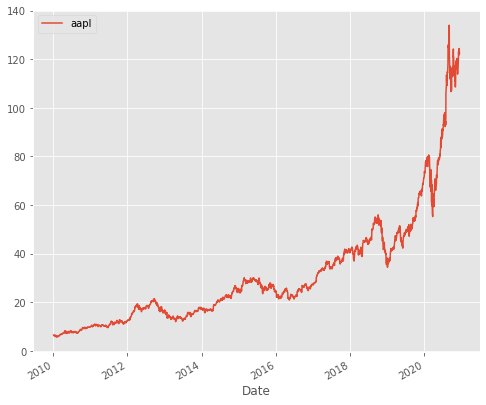

In [28]:
style.use('ggplot')

# The following sets the size of the figure

mpl.rc('figure',figsize=(8,7))

# Then the next line uses plot to produce a line plot

aClose.plot(label='aapl')

# Then the next line shows the legend on the chart

plt.legend()
plt.show()

#### Let's adjust some features of our graph
>- With `figsize(width,height)` we can adjust the width and height of our chart
>- With `plt.style.use(['dark_background`]) we can make the background black instead of the default white.
>- The link below provides more documentation on the different ways you can customize your charts:
>>- https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html

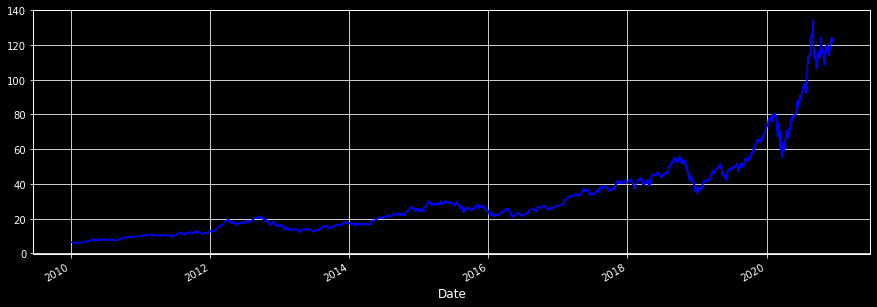

In [29]:
style.use('ggplot')

plt.style.use(['dark_background'])

mpl.rc('figure',figsize=(15,5))

aClose.plot(label='aapl',color='b')

plt.show()

### Now, plot the moving averages with the close price
>- Stock analysts look at charts like this to help them decide when to buy and sell

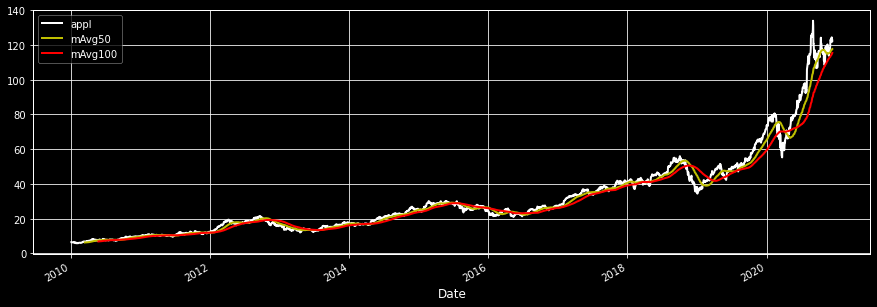

In [30]:
# Set plot options

style.use('ggplot')

plt.style.use(['dark_background'])

mpl.rc('figure',figsize=(15,5))

mpl.rc('lines',linewidth=2)

# Now each call to the plot method plots a series on the same chart

aClose.plot(label='appl',color='w')

mAvg50.plot(label='mAvg50',color='y')

mAvg100.plot(label='mAvg100',color='r')

plt.legend()

plt.show()

## Plotting Returns with the default `plot()` which is a line plot

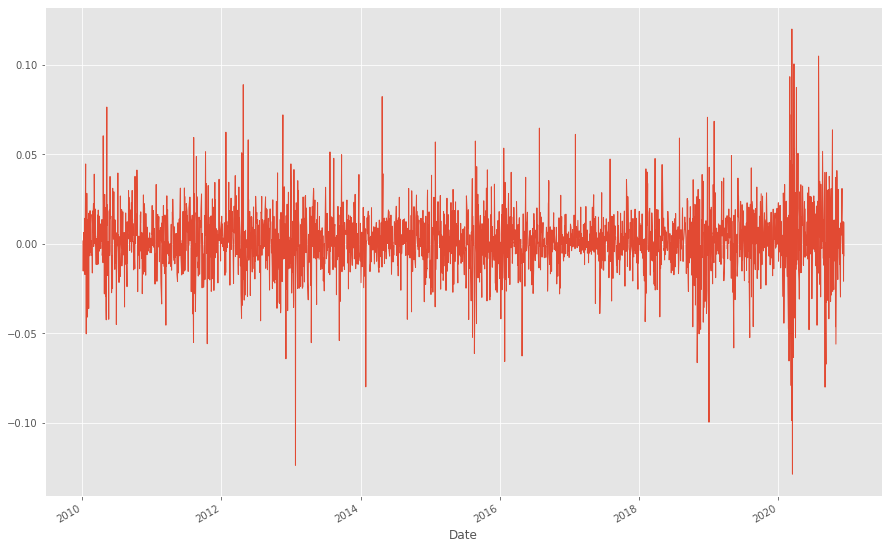

In [31]:
# Set the plot options

style.use('ggplot')
mpl.rc('figure',figsize=(15,10))
mpl.rc('lines',linewidth=1)

# Call the plot method on your series

dayRet.plot(label='Daily Returns')
plt.show()

## Plotting a boxplot for a summary chart on returns
### Boxplots show us:
>- Mean, Median, 1st and 3rd quartiles, minimum and maximum values
>>- Reference: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot

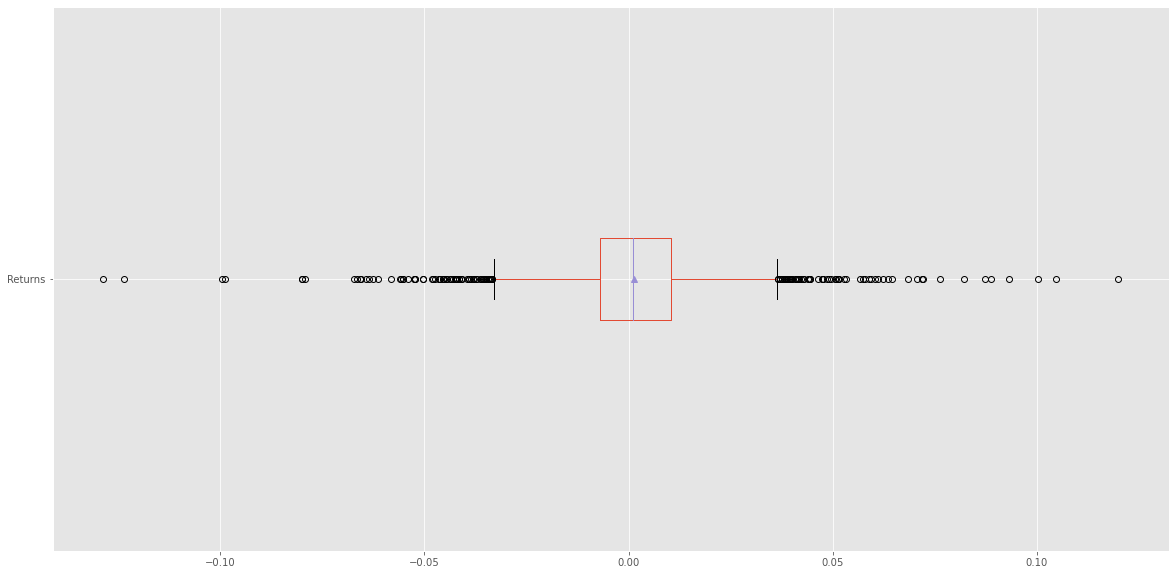

In [32]:
# Set your options

style.use('ggplot')
mpl.rc('figure',figsize=(20,10))
mpl.rc('lines',linewidth=2)

# Call the plot method on the series
# Passing kind='box' will create a boxplot

dayRet.plot(kind='box', showmeans=True, vert=False, label='Returns')
plt.show()